In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sktime.performance_metrics.forecasting import MeanAbsoluteScaledError
import numpy as np


In [2]:
mase = MeanAbsoluteScaledError()
dataset = 'covid_deaths'

In [3]:
def plot_predictions(x, y_true, predictions, title):
    fig, ax = plt.subplots()

    horizon = len(predictions.columns) + 5
    ax.plot(x[-horizon:], y_true[-horizon:], label='ground truth')
    
    x_pred = x[-len(predictions.columns):]
    for modelname in predictions.index:
        ax.plot(x_pred, predictions.loc[modelname].to_list(), label=modelname)
    ax.legend()
    ax.tick_params(axis='x', labelrotation = 90)    
    ax.set_title(title)

    autoregression  moving average      ARMA     TBATS  autoPyTorch  ensemble
T1        1.642997        3.205781  1.243110  2.161830     1.325220  1.006871
T2        7.579878       15.308089  5.169751  6.379722     7.070122  5.618824
T3        0.307934        6.722265  0.780492  0.437341     0.317810  0.472002
T4        0.712685        1.166038  0.817647  1.323442     0.000000  0.777358
T5       16.121644       17.581860  4.525372  6.324055    11.404665  1.100376


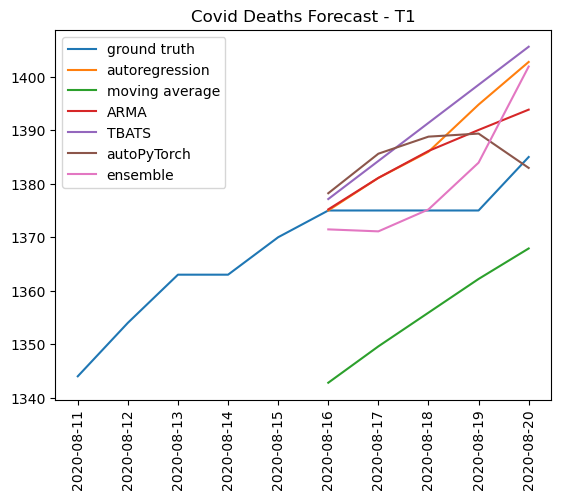

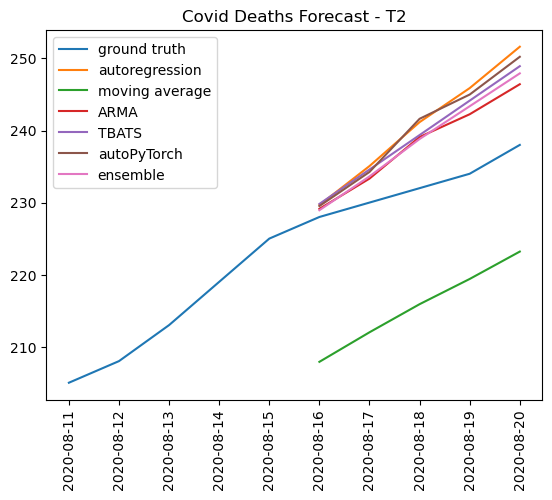

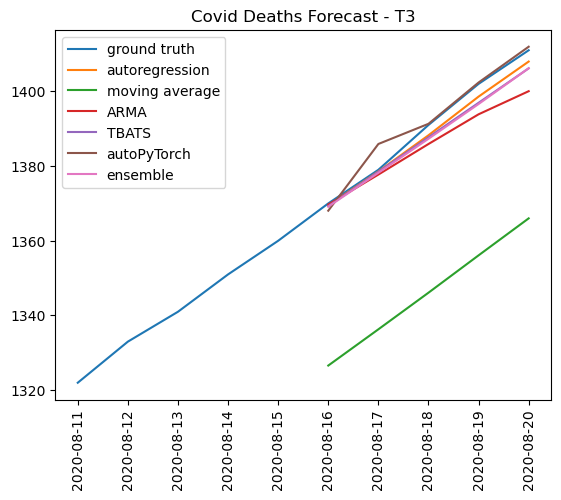

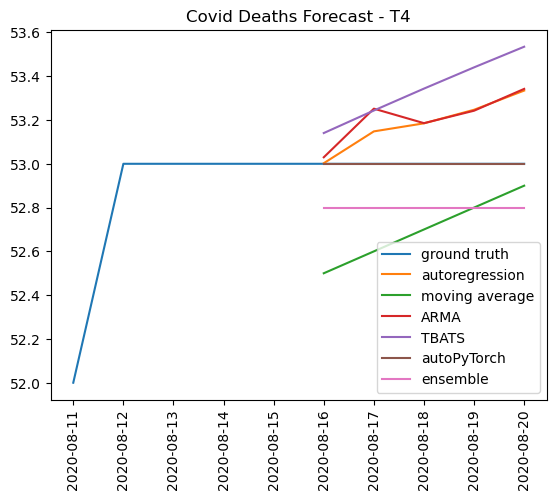

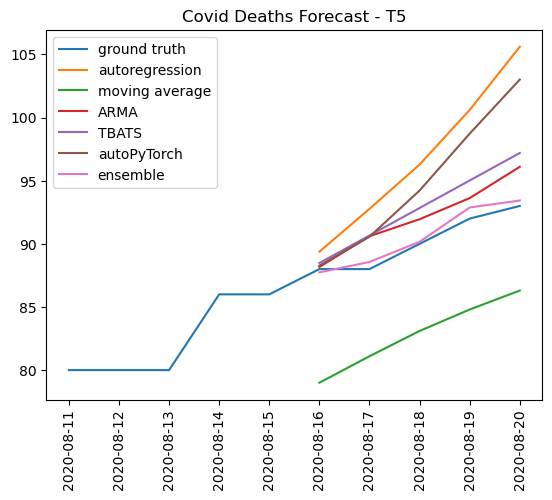

In [4]:
errors = {}

for i in range(1,6):
    data = pd.read_csv(f'data/clean/{dataset}.csv').set_index('date')
    x = pd.to_datetime(data.index, format='%Y-%m-%d')
    seriesname = f'T{i}'

    y_true = data[seriesname].values
    predictions = pd.read_csv(f'results/predictions/{dataset}_{seriesname}_5.csv', index_col=0)

    errors[seriesname] = {
        modelname: mase(y_true[-len(predictions.columns):], np.array(predictions.loc[modelname]), y_train=y_true[:-len(predictions.columns)]) for modelname in predictions.index
    }

    plot_predictions(x, y_true, predictions, f'Covid Deaths Forecast - {seriesname}')

errors = pd.DataFrame.from_dict(errors, orient='index')
errors.to_csv(f'results/{dataset}_MASE.csv')

print(errors)